In [22]:
from keras.models import load_model
from keras.utils import pad_sequences
import datetime
import os
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

from load_run_models import *
from create_datasets import *

In [21]:
start_date = datetime.datetime(year=2020,month=7,day=1)
end_date = datetime.datetime(year=2022,month=7,day=1)
data = 'analisis/S&P_500.xlsx'

In [ ]:
# Create the datasets
df = pd.read_excel(data)
RICs = df['Identifier'].to_list()
for RIC in RICs:    
    if RIC not in ['ACLT.DH','ENER.DH','NABV.NS','QUER.MOT','MLECO.EUA','ABENU.PK','EJGJ.SJ']:
        print(RIC)
        RIC_dates = RIC + '-' + str(start_date.date()) + '-' + str(end_date.date())
        
        name_file_xlsx = os.path.join('data' , RIC_dates + '.xlsx')
        df = download_hist(name_file_xlsx,RIC_dates)
        
        if df is not None and np.sum(np.isnan(df['CLOSE'])) == 0:    
            name_file_txt = os.path.join('data' , RIC_dates + '.txt')
            save_hist(df,name_file_txt)
            print(f'Done')


In [2]:
# Load the model
task = 1
len_min = 10
len_max = 20
path = 'ANDI_Challenge/models/task1'
name_model = f'task{task}_len_{len_min}_{len_max}.h5'
model = load_model(os.path.join(path,name_model))

In [3]:
# Load the data and prepare
df = pd.read_excel(data)

In [4]:
dates_str = str(start_date.date()) + '-' + str(end_date.date())
df = predict(model,df,dates_str)

AFL.N


c:\Users\Ruben\Documents\PhD_AI\diffusion\load_run_models.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  task = np.array([x[1:] for x in task])


1/1 [==============================] - 3s 3s/step
AES.N
2/2 [==============================] - 0s 7ms/step
ABT.N
2/2 [==============================] - 0s 7ms/step
ABMD.OQ
2/2 [==============================] - 0s 5ms/step
ATVI.OQ
2/2 [==============================] - 0s 5ms/step
ADBE.OQ
2/2 [==============================] - 0s 6ms/step
AMD.OQ
2/2 [==============================] - 0s 5ms/step
APD.N
2/2 [==============================] - 0s 5ms/step
ALK.N
2/2 [==============================] - 0s 5ms/step
ALB.N
2/2 [==============================] - 0s 6ms/step
HON.OQ
1/1 [==============================] - 0s 21ms/step
ALL.N
1/1 [==============================] - 0s 20ms/step
HWM.N
2/2 [==============================] - 0s 5ms/step
HES.N
2/2 [==============================] - 0s 3ms/step
AEE.N
2/2 [==============================] - 0s 5ms/step
AEP.OQ
2/2 [==============================] - 0s 5ms/step
AXP.N
2/2 [==============================] - 0s 5ms/step
AIG.N
1/1 [================

In [6]:
df

,Unnamed: 0,Identifier,Company Name,TRBC Industry Name,avg_exp
0,0,AFL.N,Aflac Inc,Life & Health Insurance,1.061022
1,1,AES.N,AES Corp,Electric Utilities,1.018451
2,2,ABT.N,Abbott Laboratories,"Medical Equipment, Supplies & Distribution",0.962275
3,3,ABMD.OQ,ABIOMED Inc,Advanced Medical Equipment & Technology,1.036704
4,4,ATVI.OQ,Activision Blizzard Inc,Online Services,0.988081
...,...,...,...,...,...
498,498,AMCR.N,Amcor PLC,Non-Paper Containers & Packaging,0.897935
499,499,CARR.N,Carrier Global Corp,Electrical Components & Equipment,1.075531
500,500,OTIS.N,Otis Worldwide Corp,Heavy Electrical Equipment,0.988221
501,501,OGN.N,Organon & Co,Pharmaceuticals,


In [3]:
import pandas as pd
df = pd.read_excel('analisis\S&P_500_analisis.xlsx')
df

,Unnamed: 0.1,Unnamed: 0,Identifier,Company Name,TRBC Industry Name,avg_exp,Hist_Vol,Impl_Vol
0,0,0,AFL.N,Aflac Inc,Life & Health Insurance,1.061022,7.008180,27.31
1,1,1,AES.N,AES Corp,Electric Utilities,1.018451,8.789450,33.94
2,2,2,ABT.N,Abbott Laboratories,"Medical Equipment, Supplies & Distribution",0.962275,6.767403,27.86
3,3,3,ABMD.OQ,ABIOMED Inc,Advanced Medical Equipment & Technology,1.036704,11.374223,48.61
4,4,4,ATVI.OQ,Activision Blizzard Inc,Online Services,0.988081,9.320320,16.94
...,...,...,...,...,...,...,...,...
498,498,498,AMCR.N,Amcor PLC,Non-Paper Containers & Packaging,0.897935,6.658157,27.28
499,499,499,CARR.N,Carrier Global Corp,Electrical Components & Equipment,1.075531,8.574958,34.36
500,500,500,OTIS.N,Otis Worldwide Corp,Heavy Electrical Equipment,0.988221,6.770976,30.06
501,501,501,OGN.N,Organon & Co,Pharmaceuticals,NaN,NaN,NaN


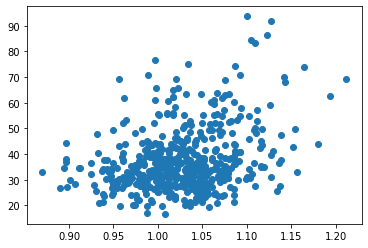

In [7]:
plt.scatter(df['avg_exp'],df['Impl_Vol'])

<AxesSubplot:xlabel='avg_exp', ylabel='Impl_Vol'>

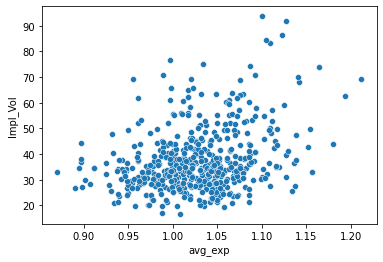

In [9]:
sns.scatterplot(x="avg_exp", y="Impl_Vol", data=df)

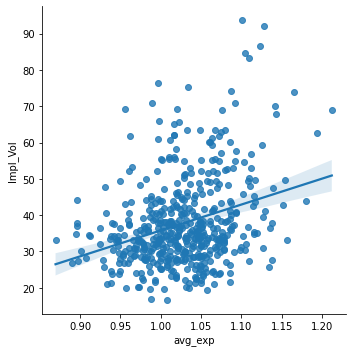

In [13]:
sns.lmplot(x="avg_exp", y="Impl_Vol", data=df)

In [14]:
df_clean = df.dropna()
stats.pearsonr(df_clean['avg_exp'], df_clean['Impl_Vol'])

(0.30403018946186733, 3.936941519982946e-12)

In [15]:
stats.pearsonr(df_clean['avg_exp'], df_clean['Hist_Vol'])

(0.2419311578899192, 4.442861125603095e-08)

In [17]:
stats.pearsonr(df_clean['Impl_Vol'], df_clean['Hist_Vol'])

(0.9218691566957691, 9.130261472425148e-207)